# Gradient Boosting Implementation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\my pc\OneDrive - American International University-Bangladesh\American International University-Bangladesh\Data Mining\dataset\taxi_fare\train.csv")

In [3]:
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_duration,209673.0,1173.181478,4775.653621,0.00,446.00,707.00,1098.00,86387.00
distance_traveled,209673.0,5.054431,125.217419,0.02,1.95,3.20,5.73,57283.91
num_of_passengers,209673.0,1.292808,0.930754,0.00,1.00,1.00,1.00,9.00
fare,209673.0,99.623431,85.602702,0.00,52.50,75.00,116.25,4466.25
tip,209673.0,13.030824,20.367764,0.00,0.00,9.00,20.00,2500.00
miscellaneous_fees,209673.0,15.136829,12.553436,-0.50,6.00,9.75,26.45,435.00
total_fare,209673.0,127.791084,98.797374,0.00,70.20,101.70,152.25,4472.25
surge_applied,209673.0,0.280523,0.449256,0.00,0.00,0.00,1.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [6]:
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

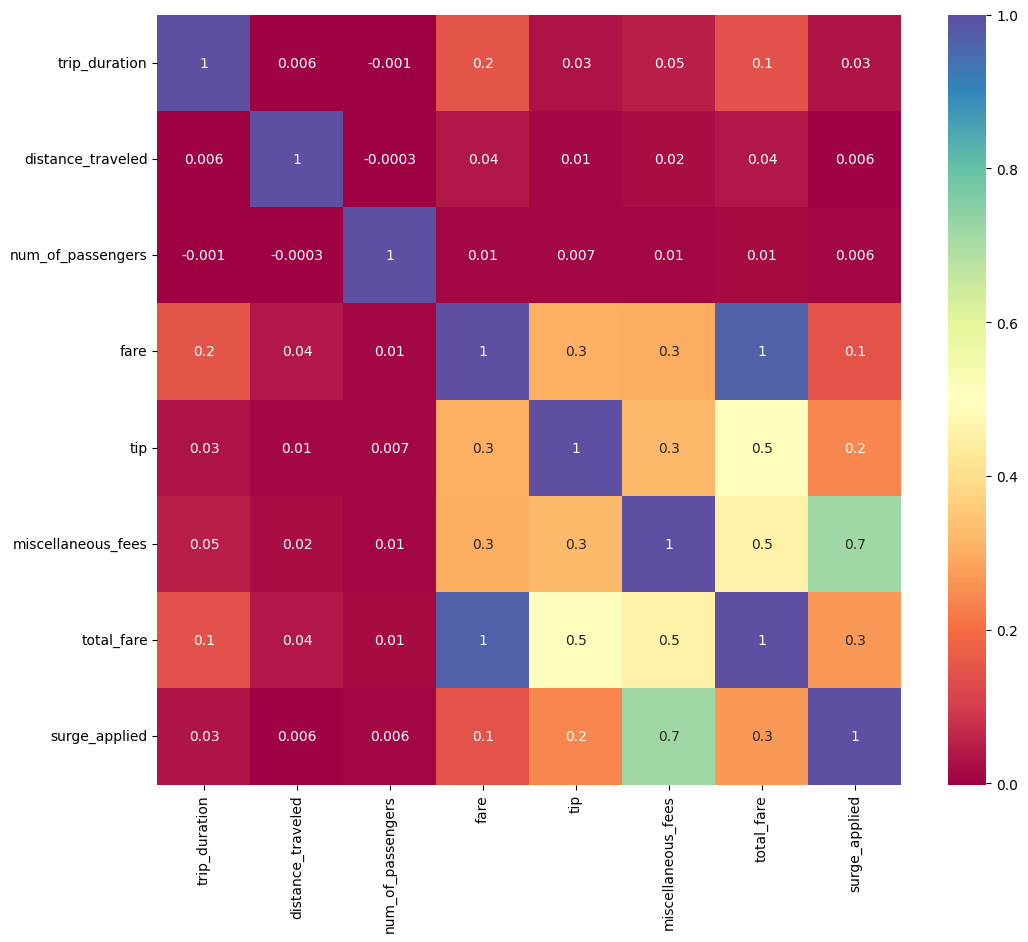

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='0.1g',cmap='Spectral')
plt.show()

# Model Building

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop(['fare','miscellaneous_fees','total_fare'],axis=1)
y=df['fare']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)

In [13]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [14]:
y_pred=model.predict(X_test)
y_pred

array([ 55.197379  ,  37.57293318, 161.50277628, ...,  41.57007128,
        53.44141656,  42.35883672])

In [31]:
model.score(X_test,y_test)

0.7761494606064574

# Hyperparameter tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'max_depth': np.arange(3, 11),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [23]:
model_2 = GradientBoostingRegressor()

In [24]:
random_search = RandomizedSearchCV(model_2, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)


In [26]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [27]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [28]:
best_params

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'learning_rate': 0.3}

In [29]:
best_model

GradientBoostingRegressor(learning_rate=0.3, min_samples_leaf=2)

In [30]:
print("Randomized Search Results:")
for i, (params, score) in enumerate (zip(random_search.cv_results_['params'], random_search.cv_results_['mean_test_score'])):
    print(f"Combination {i+1} - Parameters: {params}, Mean Test Score (Accuracy): {score:.4f}")

Randomized Search Results:
Combination 1 - Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.3}, Mean Test Score (Accuracy): 0.7372
Combination 2 - Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.5}, Mean Test Score (Accuracy): 0.7338
Combination 3 - Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.2}, Mean Test Score (Accuracy): 0.7552
Combination 4 - Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.3}, Mean Test Score (Accuracy): 0.7225
Combination 5 - Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.3}, Mean Test Score (Accuracy): 0.7429
Combination 6 - Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'lear